In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [4]:
df = pd.read_csv(r'E:\Projects\Final_year Project\Dataset\Tamilnadu Location.csv')

In [5]:
df.head(5)

,location,latitude,longitude
0,Chennai,13.08369,80.27019
1,Kancheepuram,12.83639,79.70533
2,Chengalpattu,12.68409,79.98364
3,Ranipet,12.92726,79.33301
4,Tiruvallur,13.13942,79.90708


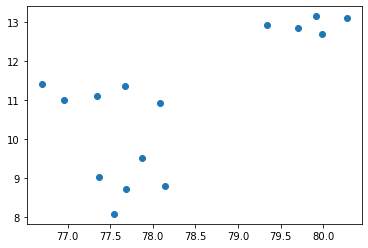

In [6]:
plt.scatter(df['longitude'],df['latitude'])

In [8]:
km = KMeans(n_clusters=3)
print(km)

KMeans(n_clusters=3)


In [9]:
y_predicted = km.fit_predict(df[['longitude','latitude']])
y_predicted

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1])

In [10]:
df['cluster'] = y_predicted
df.head(5)

,location,latitude,longitude,cluster
0,Chennai,13.08369,80.27019,0
1,Kancheepuram,12.83639,79.70533,0
2,Chengalpattu,12.68409,79.98364,0
3,Ranipet,12.92726,79.33301,0
4,Tiruvallur,13.13942,79.90708,0


No handles with labels found to put in legend.


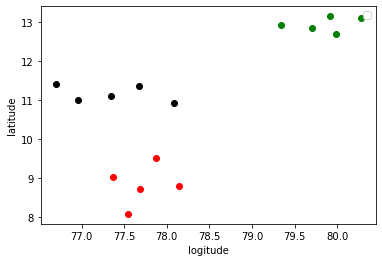

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.longitude,df1.latitude,color='green')
plt.scatter(df2.longitude,df2.latitude,color='red')
plt.scatter(df3.longitude,df3.latitude,color='black')

plt.xlabel('logitude')
plt.ylabel('latitude')
plt.legend()



In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['longitude','latitude']])
y_predicted

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2])

In [13]:
df['clusterr'] = y_predicted
df

,location,latitude,longitude,cluster,clusterr
0,Chennai,13.08369,80.27019,1,1
1,Kancheepuram,12.83639,79.70533,1,1
2,Chengalpattu,12.68409,79.98364,1,1
3,Ranipet,12.92726,79.33301,1,1
4,Tiruvallur,13.13942,79.90708,1,1
5,Niligiris,11.41268,76.70305,0,0
6,Erode,11.36920,77.67663,0,0
7,Coimbatore,11.00181,76.96284,0,0
8,Tiruppur,11.10178,77.34519,0,0
9,Karur,10.93015,78.08485,0,0


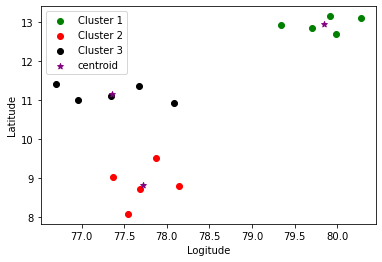

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.longitude,df1.latitude,color='green',label='Cluster 1')
plt.scatter(df2.longitude,df2.latitude,color='red',label='Cluster 2')
plt.scatter(df3.longitude,df3.latitude,color='black',label='Cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Logitude')
plt.ylabel('Latitude')
plt.legend()

In [13]:
km.cluster_centers_

array([[79.83985 , 12.93417 ],
       [77.724206,  8.835108],
       [77.354512, 11.163124]])

In [14]:
k_rang = range(1,10)
sse = []
for k in k_rang:
    km = KMeans(n_clusters=k)
    km.fit(df[['longitude','latitude']])
    sse.append(km.inertia_)

In [15]:
sse

[63.714860934586696,
 17.358858187929986,
 3.468027813200001,
 2.5443718679166665,
 1.8176097589416682,
 1.5011176271166633,
 1.138805470849993,
 0.8665868021083303,
 0.7081651221499999]

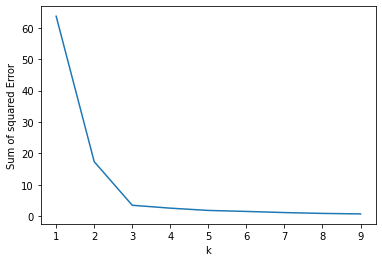

In [16]:
plt.xlabel('k')
plt.ylabel('Sum of squared Error')
plt.plot(k_rang,sse)